#### [**Mathematical Modeling of Unsteady Inviscid Flows**](https://www.springer.com/gp/book/9783030183189)
**by Jeff D. Eldredge** (Springer, 2019)

This Jupyter notebook and associated code serve as a companion to the book. The notebook is powered by the [`PotentialFlow`](https://github.com/darwindarak/PotentialFlow.jl) package, written in the [Julia language](https://julialang.org/) by Darwin Darakananda and Jeff D. Eldredge. *The code is released under the [MIT license](https://opensource.org/licenses/MIT).*
<hr />

<!--NAVIGATION-->
< [Previous notebook](3.1-StreamfunctionOfRigidBody.ipynb) | [Contents](Index.ipynb) | [Next notebook](Header.ipynb) >

## Basic potential flows in the plane

Here, we explore basic potential flows in the two-dimensional plane, and particularly, the flow fields associated with them. This notebook supports **Section 3.2.2** in the book.

#### First, carry out the preparatory steps.

Load the necessary packages.

In [5]:
using PotentialFlow
using Plots
pyplot()

Plots.PyPlotBackend()

Set up the output grid for evaluating fields. We will also set up a 2d array of complex coordinates, since we will be evaluating complex potentials and velocities later. Note that the `Z` array below, like other 2d arrays, is indexed first with the `x` location and second with the `y` location. This means each column of the array is associated with a row in the grid, and vice versa.

In [31]:
nx = 201; ny = 201
xmin = -2; xmax = 2
ymin = -2; ymax = 2
x = range(xmin,xmax,length=nx)
y = range(ymin,ymax,length=ny)

# Output grid of complex coordinates.
Z = [xi + im*yi for xi in x, yi in y]

# Initialize complex potential.
F = zeros(ComplexF64,nx,ny);

#### Uniform flow.

Let's start with a uniform flow. In the previous notebook on the [streamfunction of rigid-body motion](3.1-StreamfunctionOfRigidBody.ipynb) we saw an example of streamlines associated with a moving rigid body. A uniform flow is closely related with rigid-body translation. But here we will evaluate the complex potential of this uniform flow.

Set the uniform flow. Note that the complex velocity is in its usual conjugate form. **Explore other values!**

In [66]:
U∞ = 1.0
V∞ = -2.0
W∞ = U∞-im*V∞

1.0 + 2.0im

Evaluate the complex potential field (3.86).

In [67]:
F .= W∞*Z;

Plot the streamlines. Here, we make use of the fact that the streamfunction is the imaginary part of the complex potential. We need to transpose the array, as we did in the last notebook.

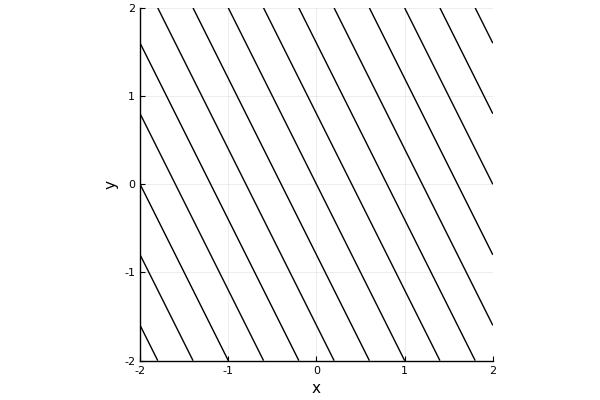

In [69]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

In the `PotentialFlow` package we can create this uniform flow field with the `Freestream` function. We supply this function with the complex velocity given in non-conjugate form:

In [65]:
fs = Freestreams.Freestream(U∞+im*V∞)

PotentialFlow.Freestreams.Freestream(1.0 - 2.0im)

And we can plot the streamlines with the `streamlines` function. Note that this function (technically, a *plot recipe* for the `Plots` package) expects a *tuple* of potential flow elements. Here, we supply it with only one such element: the uniform flow. In Julia, a tuple with only a single entry is assigned by `(entry1,)`.

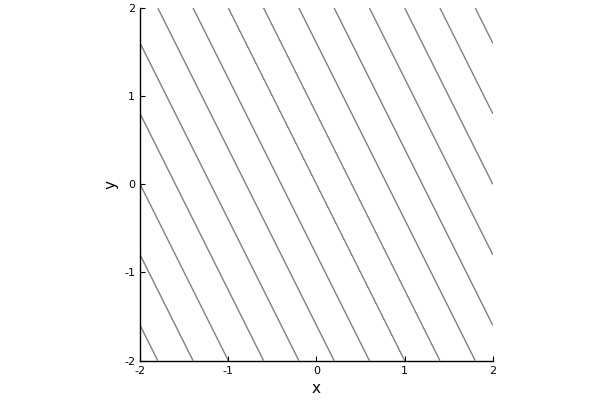

In [72]:
streamlines(x,y,(fs,),ratio = 1, legend = :false,
    xlabel="x",ylabel="y",xlim=(xmin,xmax),ylim=(ymin,ymax))

#### Point vortex.

Now let's create a single point vortex and inspect the flow field associated with it. Here we will evaluate equation (3.88).

First we will place this at the origin, with strength 1.

In [49]:
Γ = 1.0;

Evaluate it.

In [50]:
F .= Γ/(2π*im)*log.(Z);

ane plot its streamlines

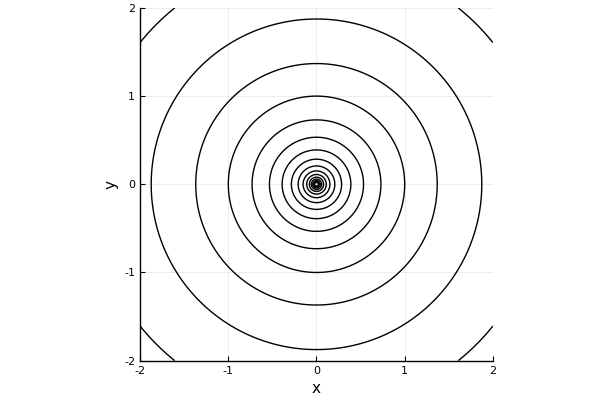

In [51]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

Now let us place the vortex at another location, $(x,y) = (1,1)$. 

In [52]:
zv = 1+im*1

1 + 1im

Evaluate the complex potential now with the vortex at the new location.

In [53]:
F .= Γ/(2π*im)*log.(Z .- zv);

and plot it

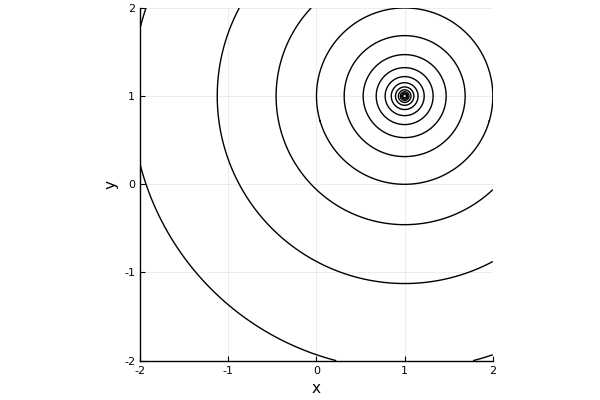

In [54]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

The flow pattern is the same (concentric circles), but the center has shifted!

With the `PotentialFlow` package, it is easy to generate this with `Vortex.Point`:

In [76]:
v = Vortex.Point(zv,Γ)

Vortex.Point(1.0 + 1.0im, 1.0)

and plot the streamlines, once again, with the `streamlines` recipe:

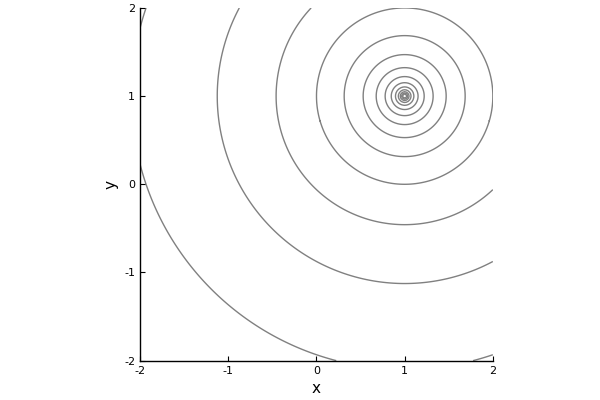

In [111]:
streamlines(x,y,(v,),ratio = 1, legend = :false,
    xlabel="x",ylabel="y",xlim=(xmin,xmax),ylim=(ymin,ymax))

#### Source and sink.

A point (or monopole) source is similar in structure to a vortex, but has streamlines that radiate outward from the center. A sink (a source with negative strength) has streamlines that radiate inward. The complex potential is given by (3.88) again.

Let's place a source at $(1,1)$.

In [133]:
zs = 1.0+im*1.0
Q = 1.0;

Use the `PotentialFlow` package's `Source.Point` function to create the element

In [136]:
s = Source.Point(zs,Q)

Source.Point(1.0 + 1.0im, 1.0)

and plot the streamlines

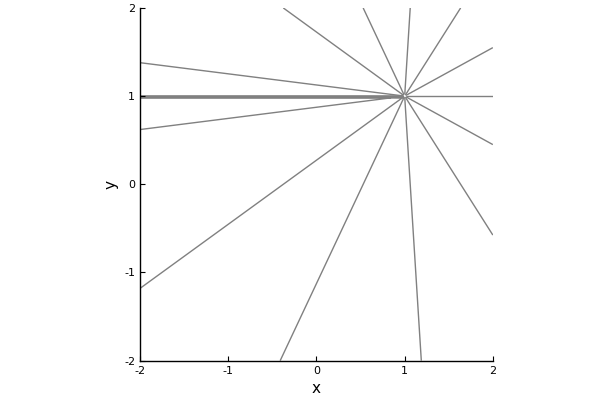

In [137]:
streamlines(x,y,(s,),ratio = 1, legend = :false,
    xlabel="x",ylabel="y",xlim=(xmin,xmax),ylim=(ymin,ymax))

Note the presence of the *branch cut* in the streamfunction field! The streamfunction of a source or sink, equation (3.77), is multi-valued, and Julia, like most mathematical software, places the branch cut along the $-x$ axis (in a coordinate system based at the center of the source). Multi-valuedness for planar singularities is discussed in detail in **Note 3.2.2**.

#### Doublet (or dipole).

A doublet is characterized by a position and a vector strength. The strength vector specifies the magnitude and the orientation of the doublet. Its complex potential is given by equation (3.90). Note that the complex strength vector defines the *axis* of the doublet. Along this axis, the **flow proceeds *opposite* the direction in which the strength vector points**.

The scalar potential is written in vector form in (3.79), and the complex and vector strengths are related in (3.91).

In `PotentialFlow` we can create a doublet by specifying its position and complex strength. However, note that the strength we specify for this function is equivalent to **half of the complex strength** defined in (3.90). 

In [127]:
# Position
zd = 0.0+0.0im

# Strength.
Sd = 1.0+0im

# Set up the doublet element.
d = Doublets.Doublet(zd,Sd)

PotentialFlow.Doublets.Doublet{Complex{Float64}}(0.0 + 0.0im, 1.0 + 0.0im)

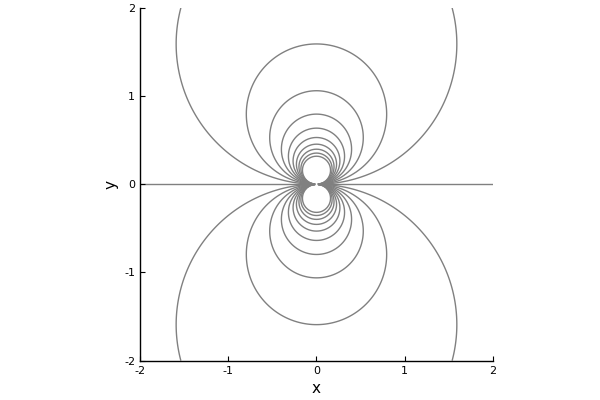

In [130]:
streamlines(x,y,(d,),ratio = 1, legend = :false,
    xlabel="x",ylabel="y",xlim=(xmin,xmax),ylim=(ymin,ymax),
    levels=range(-1,1,length=21))

Note that the streamlines of a doublet are circles, all tangent to the $x$ axis.

### Combination of potential flows.

#### A Kelvin oval.

Let's combine the preceding flows. We will construct a *Kelvin oval*, consisting of two counter-rotating point vortices arranged along the $y$ axis (at $-i h$ with strength $\Gamma$ and $ih$ with strength $-\Gamma$) and a uniform flow $U_\infty$ in the $x$ direction that opposes the flow that this vortex pair generates along the centerline.

The complex velocity field of this flow is given by

$w(z) = U_\infty + \dfrac{\Gamma}{2\pi i}\left( \dfrac{1}{z+ih} - \dfrac{1}{z-ih}\right)$

In [102]:
U∞ = 1.0
Γ = 5.0
h = 1.0
fs = Freestreams.Freestream(U∞)
vlo = Vortex.Point(-im*h,Γ)
vhi = Vortex.Point(im*h,-Γ)
sys = (fs,vlo,vhi)

(PotentialFlow.Freestreams.Freestream(1.0 + 0.0im), Vortex.Point(0.0 - 1.0im, 5.0), Vortex.Point(0.0 + 1.0im, -5.0))

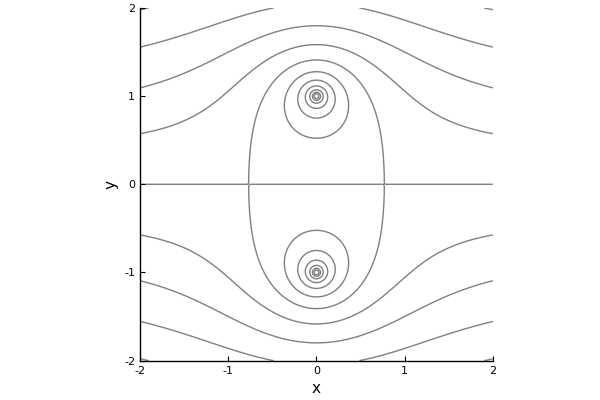

In [103]:
streamlines(x,y,sys,ratio = 1, legend = :false,
    xlabel="x",ylabel="y",xlim=(xmin,xmax),ylim=(ymin,ymax))

The *stagnation streamline* exhibits an oval shape around the vortex pair. It is a good exercise to show that the stagnation points generated by this flow occur at

$$x_s = \pm \left[ \dfrac{\Gamma h}{\pi U_\infty} - h^2\right]^{1/2}$$

Note that the strength of the vortices must be at least $\pi U_\infty h$ to generate a closed body. Evaluate the position of the stagnation points:

In [107]:
xs = sqrt(Γ*h/(π*U∞)-h^2)

0.7691225070942558

Check that the velocity is indeed zero here, using the `induce_velocity` function of the `PotentialFlow` package:

In [109]:
induce_velocity(xs+0im,sys,0.0)

0.0 + 0.0im

#### Doublet in a uniform flow

If we combine a doublet, whose axis lies along the $x$ axis, with a uniform flow, we also generate a closed body.

### Corner and wedge flows

<!--NAVIGATION-->
< [Previous notebook](3.1-StreamfunctionOfRigidBody.ipynb) | [Contents](Index.ipynb) | [Next notebook](Header.ipynb) >